# Рекомендация тарифов для телеком компании

<h2> (Тема №6: Введение в машинное обучение) <a class="tocSkip"> </h2>

<a name="1"></a>
## 1. Содержание

[1. Содержание](#1)

[2. Описание проекта](#2)

*    [2.1. Цель проекта](#21)
*    [2.2. Задачи проекта](#22)
*    [2.3. Описание данных](#23)
*    [2.4. План работы](#24)

[3. Изучение данных](#3)

*    [3.1. Общая информация](#31)
*    [3.2. Вывод](#32)

[4. Разделение данных на выборки](#4)

*    [4.1. Разбиение и проверка на корректность](#41)
*    [4.2. Вывод](#42)

[5. Исследование моделей](#5)

*    [5.1. `DecisionTreeClassifier`](#51)
*    [5.2. `RandomForestClassifier`](#52)
*    [5.3. `RandomForestClassifier` + `GridSearchCV`](#53)
*    [5.4. `LogisticRegression`](#54)
*    [5.5. Сравнение моделей](#55)
*    [5.6. Вывод](#56)

[6. Тестирование лучшей модели](#6)

*    [6.1. Качество модели](#61)
*    [6.2. Вывод](#62)

[7. Проверка модели на адекватность](#7)

*    [7.1. `DummyClassifier`](#71)
*    [7.2. Вывод](#72)

[8. Общий вывод](#8)

<a name="2"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 2. Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта «Определение выгодного тарифа для телеком компании» темы №4 «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. **Предобработка данных уже была проведена в проекте №4.**

Построим модель с максимально большим значением *accuracy*: нужно довести долю правильных ответов по крайней мере до 0.75. Проверим *accuracy* на тестовой выборке.

<a name="21"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.1. Цель проекта

Провести исследование с целью построения модели машинного обучения, которая поможет предложить пользователям новый тариф «Смарт» или «Ультра» на основании их поведения. 

Результаты исследования позволят оператору мобильной связи перевести клиентов с архивных тарифов на новые.

<a name="22"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.2. Задачи проекта

1. Изучить данные.
2. Разделить данные на выборки.
3. Исследовать разные модели.
4. Протестировать лучшую модель.
5. Проверить лучшую модель на адекватность.
6. Проверить гипотезы.
7. Написать общий вывод.

В ходе проведения исследования необходимо проверить несколько гипотез:

- Гипотеза 1: лучшая модель на валидационной выборке - модель случайного леса;
- Гипотеза 2: значение метрики качества лучшей модели *accuracy* > 0.75.

<a name="23"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.3. Описание данных

Входные данные: данные о поведении клиентов, которые уже перешли на тарифы «Смарт» или «Ультра».

Файл: `users_behavior.csv`.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

**Признаки:**

- `сalls` — количество звонков
- `minutes` — суммарная длительность звонков в минутах
- `messages` — количество sms-сообщений
- `mb_used` — израсходованный интернет-трафик в Мб

**Целевой признак:**

- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

<a name="24"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 2.4. План работы

1. Изучение данных.

2. Разделение данных на обучающую, валидационную и тестовую выборки.

3. Исследование качества разных моделей, меняя гиперпараметры:

    - `DecisionTreeClassifier`
    - `RandomForestClassifier`
    - `RandomForestClassifier` + `GridSearchCV`
    - `LogisticRegression`
        
        
4. Тестирование лучшей модели: проверка качества модели на тестовой выборке.

5. Проверка лучшей модели на адекватность с помощью `DummyClassifier`.

6. Общий вывод.

<a name="3"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 3. Изучение данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm

RANDOM_STATE = 12345

<a name="31"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.1. Общая информация

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    try:
        df = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                          'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                          '06. Введение в машинное обучение/users_behavior.csv')
    except:
        try:
            df = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                              'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                              '06. Введение в машинное обучение/users_behavior.csv')
        except:
            df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
            '2PACX-1vQwS_c4Hh90esQcENK1-g1zAq7FTshj4iC-Yc_Y9CDNLqkn49HPDk-l_cGXgA5FxSdais5CgD0sym3N/'
                             'pub?gid=806324062&single=true&output=csv')

Выведем первые 10 строк датафрейма `df`.

In [3]:
display(df.head(10))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Выведем основную информацию о датафрейме `df`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Проверим явные дубликаты в датафрейме.

In [5]:
df.duplicated().sum()

0

Проверим корреляцию между признаками в датафрейме.

In [6]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


У признака `calls` имеется высокая корреляция (> 0.98) с признаком `minutes`, поэтому признак `minutes` можно удалить из датафрейма. В итоге, получим датафрейм `df_corr`.

In [7]:
df_corr = df.drop('minutes', axis=1)
df_corr.head(10)

,calls,messages,mb_used,is_ultra
0,40.0,83.0,19915.42,0
1,85.0,56.0,22696.96,0
2,77.0,86.0,21060.45,0
3,106.0,81.0,8437.39,1
4,66.0,1.0,14502.75,0
5,58.0,21.0,15823.37,0
6,57.0,20.0,3738.90,1
7,15.0,6.0,21911.60,0
8,7.0,3.0,2538.67,1
9,90.0,38.0,17358.61,0


Проверим датафрейм на сбалансированность классов в таргете.

In [8]:
df_corr['is_ultra'].value_counts()

is_ultra
0    2229
1     985
Name: count, dtype: int64

Значений класса "0" почти в 2 раза больше, чем значений класса "1". Это означает, что таргет несбалансирован: в течение месяца тарифом «Смарт» пользовались в 2 раза чаще, чем тарифом «Ультра».

<a name="32"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 3.2. Вывод

В разделе [**Изучение данных**](#3.-Изучение-данных) были выполнены следующие задачи:
1. Данные загружены из файла в датафрейм.
2. Изучена общая информация о полученном датафрейме.
3. Датафрейм проверен на явные дубликаты.
4. Проверена корреляция между признаками в датафрейме.
5. Датафрейм проверен на сбалансированность классов в таргете.
   
В результате выполнения задач этого раздела было выявлено следующее:
1. Явных дубликатов в датафрейме нет.
2. Пропусков в данных нет.
3. Типы признаков соответствуют их значениям.
4. У признака `calls` имеется высокая корреляция (> 0.98) с признаком `minutes`, поэтому мы удалили признак `minutes`.
5. В таргете значений класса "0" почти в 2 раза больше, чем значений класса "1". Это означает, что таргет несбалансирован: в течение месяца тарифом «Смарт» пользовались в 2 раза чаще, чем тарифом «Ультра».

**В проекте решается задача бинарной классификации.**

Таким образом, данные подготовлены для обучения моделей.

<a name="4"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 4. Разделение данных на выборки

<a name="41"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.1. Разбиение и проверка на корректность

Разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1. Для корректного разбиения датасетов применим аргумент `stratify`. Для постоянства результата зададим `random_state=RANDOM_STATE`, где `RANDOM_STATE` = 12345.

In [9]:
# разделим полученые данные на промежуточную (train_valid) 
# и тестовую выборки (20%)
df_train_valid, df_test = train_test_split(df_corr, 
                                           test_size=0.20, 
                                           random_state=RANDOM_STATE, 
                                           stratify=df_corr['is_ultra'])

# разделим промежуточную выборку (train_valid) на обучающую и валидационную 
# (25% от промежуточной выборки = 20% от исходного датасета)
df_train, df_valid = train_test_split(df_train_valid, 
                                      test_size=0.25, 
                                      random_state=RANDOM_STATE, 
                                      stratify=df_train_valid['is_ultra'])

# сохраним признаки в отдельных переменных
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

# признаки для использования функции GridSearchCV в модели случайного леса
features_train_valid = df_train_valid.drop('is_ultra', axis=1)
target_train_valid = df_train_valid['is_ultra']

Проверим корректность разбиения датасетов.

In [10]:
print(f'Тестовая выборка составляет: '
      f'{df_test.shape[0]/df_corr.shape[0]*100:.2f} % '
      'от исходного датасета df_corr')
print(f'Валидационная выборка составляет: '
      f'{df_valid.shape[0]/df_corr.shape[0]*100:.2f} % '
      'от исходного датасета df_corr')
print(f'Валидационная выборка составляет: '
      f'{df_valid.shape[0]/df_train_valid.shape[0]*100:.2f} % '
      'от датасета df_train_valid')

Тестовая выборка составляет: 20.01 % от исходного датасета df_corr
Валидационная выборка составляет: 20.01 % от исходного датасета df_corr
Валидационная выборка составляет: 25.01 % от датасета df_train_valid


<a name="42"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 4.2. Вывод

В разделе [**Разделение данных на выборки**](#4.-Разделение-данных-на-выборки) были выполнены следующие задачи:
1. Разделение исходных данных на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.
2. Выполнена проверка на корректность разбиения датасетов.
   
В результате выполнения задач этого раздела было выявлено следующее:
- разбиение датасетов было выполнено корректно:

```
Тестовая выборка составляет: 20.01 % от исходного датасета df_corr
Валидационная выборка составляет: 20.01 % от исходного датасета df_corr
Валидационная выборка составляет: 25.01 % от датасета df_train_valid
```

<a name="5"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 5. Исследование моделей

Исследуем качество *accuracy* разных моделей, меняя гиперпараметры. В итоге нам необходимо получить лучшую модель - т.е. модель с самым высоким значением метрики *accuracy*.

<a name="51"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.1. `DecisionTreeClassifier`

Классифицируем валидационные данные с помощью модели **дерева решений *Decision Tree***.

Для построения графиков зависимости метрики качества *accuracy* (доля правильных ответов) от глубины дерева `max_depth` на обучающей и валидационной выборках дополнительно создадим следующие списки:
- `list_depth_dt` - список со значениями глубины дерева `max_depth`;
- `list_accuracy_dt_train` - список со значениями качества модели *accuracy* на обучающей выборке;
- `list_accuracy_dt_valid` - список со значениями качества модели *accuracy* на валидационной выборке.

Библиотека `tqdm` позволяет наглядно проиллюстрировать ход выполнения программы.

In [11]:
%%time


# лучшая модель (модель с самым высоким значением метрики accuracy)
best_model_dt = None
# модель с max_depth=4 (для построения дерева решений)
model_depth_4 = None
# глубина дерева лучшей модели
best_depth_dt = 0
# метрика accuracy лучшей модели
best_result_dt = 0

# список с глубиной дерева max_depth 
list_depth_dt = []
# список с качеством модели accuracy на обучающей выборке
list_accuracy_dt_train = []
# список с качеством модели accuracy на валидационной выборке
list_accuracy_dt_valid = []

# напишем цикл для гиперпараметра max_depth от 1 до 10
for depth in tqdm(range(1, 11)):
    # построим модель дерева решений model_dt
    # с заданной глубиной дерева max_depth
    model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                                      max_depth=depth)
    # обучим модель на обучающей выборке
    model_dt.fit(features_train, target_train) 
    # посчитаем качество модели accuracy на обучающей выборке
    result_train = model_dt.score(features_train, target_train)
    # посчитаем качество модели accuracy на валидационной выборке
    result_valid = model_dt.score(features_valid, target_valid)
    # список с глубиной дерева max_depth 
    list_depth_dt.append(depth)
    # список с качеством модели accuracy на обучающей выборке
    list_accuracy_dt_train.append(result_train)
    # список с качеством модели accuracy на валидационной выборке
    list_accuracy_dt_valid.append(result_valid)
    
    # сохраним лучшие параметры
    if result_valid > best_result_dt:
        # сохраним лучшую модель
        best_model_dt = model_dt 
        # сохраним глубину дерева лучшей модели
        # на валидационной выборке
        best_depth_dt = depth 
        # сохраним метрику accuracy лучшей модели
        # на валидационной выборке
        best_result_dt = result_valid
    # сохраним модель с max_depth=4 (для построения дерева решений)
    elif depth == 4:
        model_depth_4 = model_dt
   

print('Best model DT valid:', best_model_dt)
print('Best max_depth DT valid:', best_depth_dt)
print(f'Best accuracy DT valid: {best_result_dt:.2f}')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 126.26it/s]

Best model DT valid: DecisionTreeClassifier(max_depth=5, random_state=12345)
Best max_depth DT valid: 5
Best accuracy DT valid: 0.80
CPU times: total: 109 ms
Wall time: 86.2 ms


Лучшая модель дерева решений **`DecisionTreeClassifier`** на валидационной выборке имеет значение метрики оценки качества:
- ***accuracy = 0.80*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 5

Выведем полученные списки `list_depth_dt`, `list_accuracy_dt_train` и `list_accuracy_dt_valid`.

In [12]:
# список с глубиной дерева max_depth
list_depth_dt

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
# список с качеством модели accuracy на обучающей выборке
list_accuracy_dt_train

[0.7520746887966805,
 0.779045643153527,
 0.7914937759336099,
 0.7951244813278008,
 0.8148340248962656,
 0.8283195020746889,
 0.8407676348547718,
 0.8526970954356846,
 0.8682572614107884,
 0.8801867219917012]

In [14]:
# список с качеством модели accuracy на валидационной выборке
list_accuracy_dt_valid

[0.7589424572317263,
 0.7822706065318819,
 0.80248833592535,
 0.8009331259720062,
 0.8040435458786936,
 0.7947122861586314,
 0.7978227060653188,
 0.7993779160186625,
 0.8040435458786936,
 0.7978227060653188]

Построим график зависимости качества модели дерева решений *accuracy* от глубины дерева `max_depth` на обучающей и валидационной выборках.

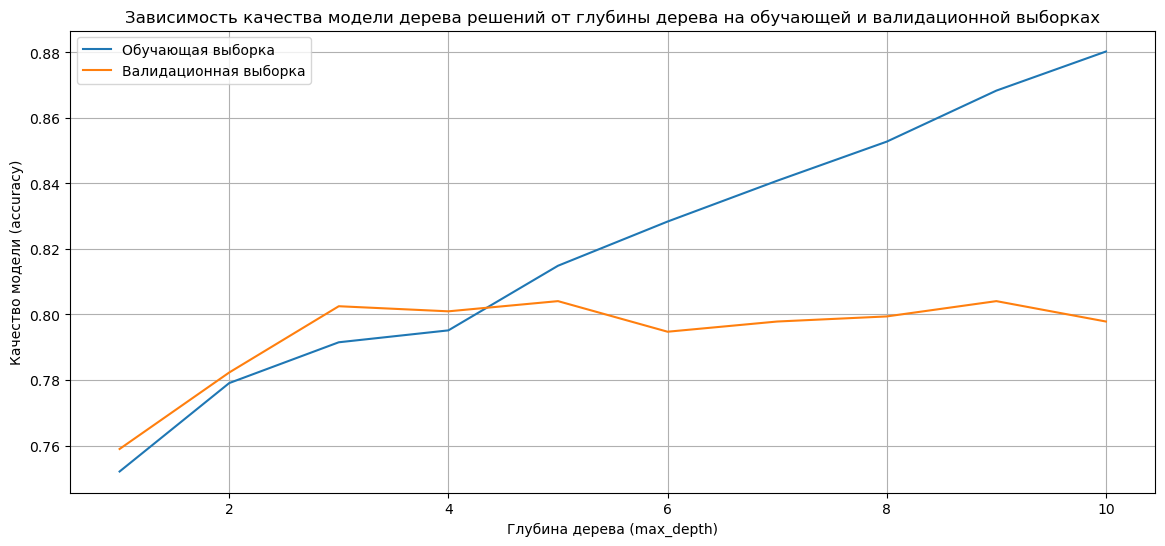

In [15]:
plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(list_depth_dt, list_accuracy_dt_train)
plt.plot(list_depth_dt, list_accuracy_dt_valid)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Качество модели (accuracy)')
plt.title('Зависимость качества модели дерева решений '
          'от глубины дерева на обучающей и валидационной выборках')
plt.show()

На графике видно, что переобучение наступает при глубине дерева `max_depth`=4$\div$5. 

Построим деревья решений для моделей `model_depth_4` (модель c `max_depth`=4) и `best_model_dt` (модель c `max_depth`=5) с помощью функции `plot_tree()`.

Дерево решений для модели `model_depth_4` (модель c `max_depth`=4).

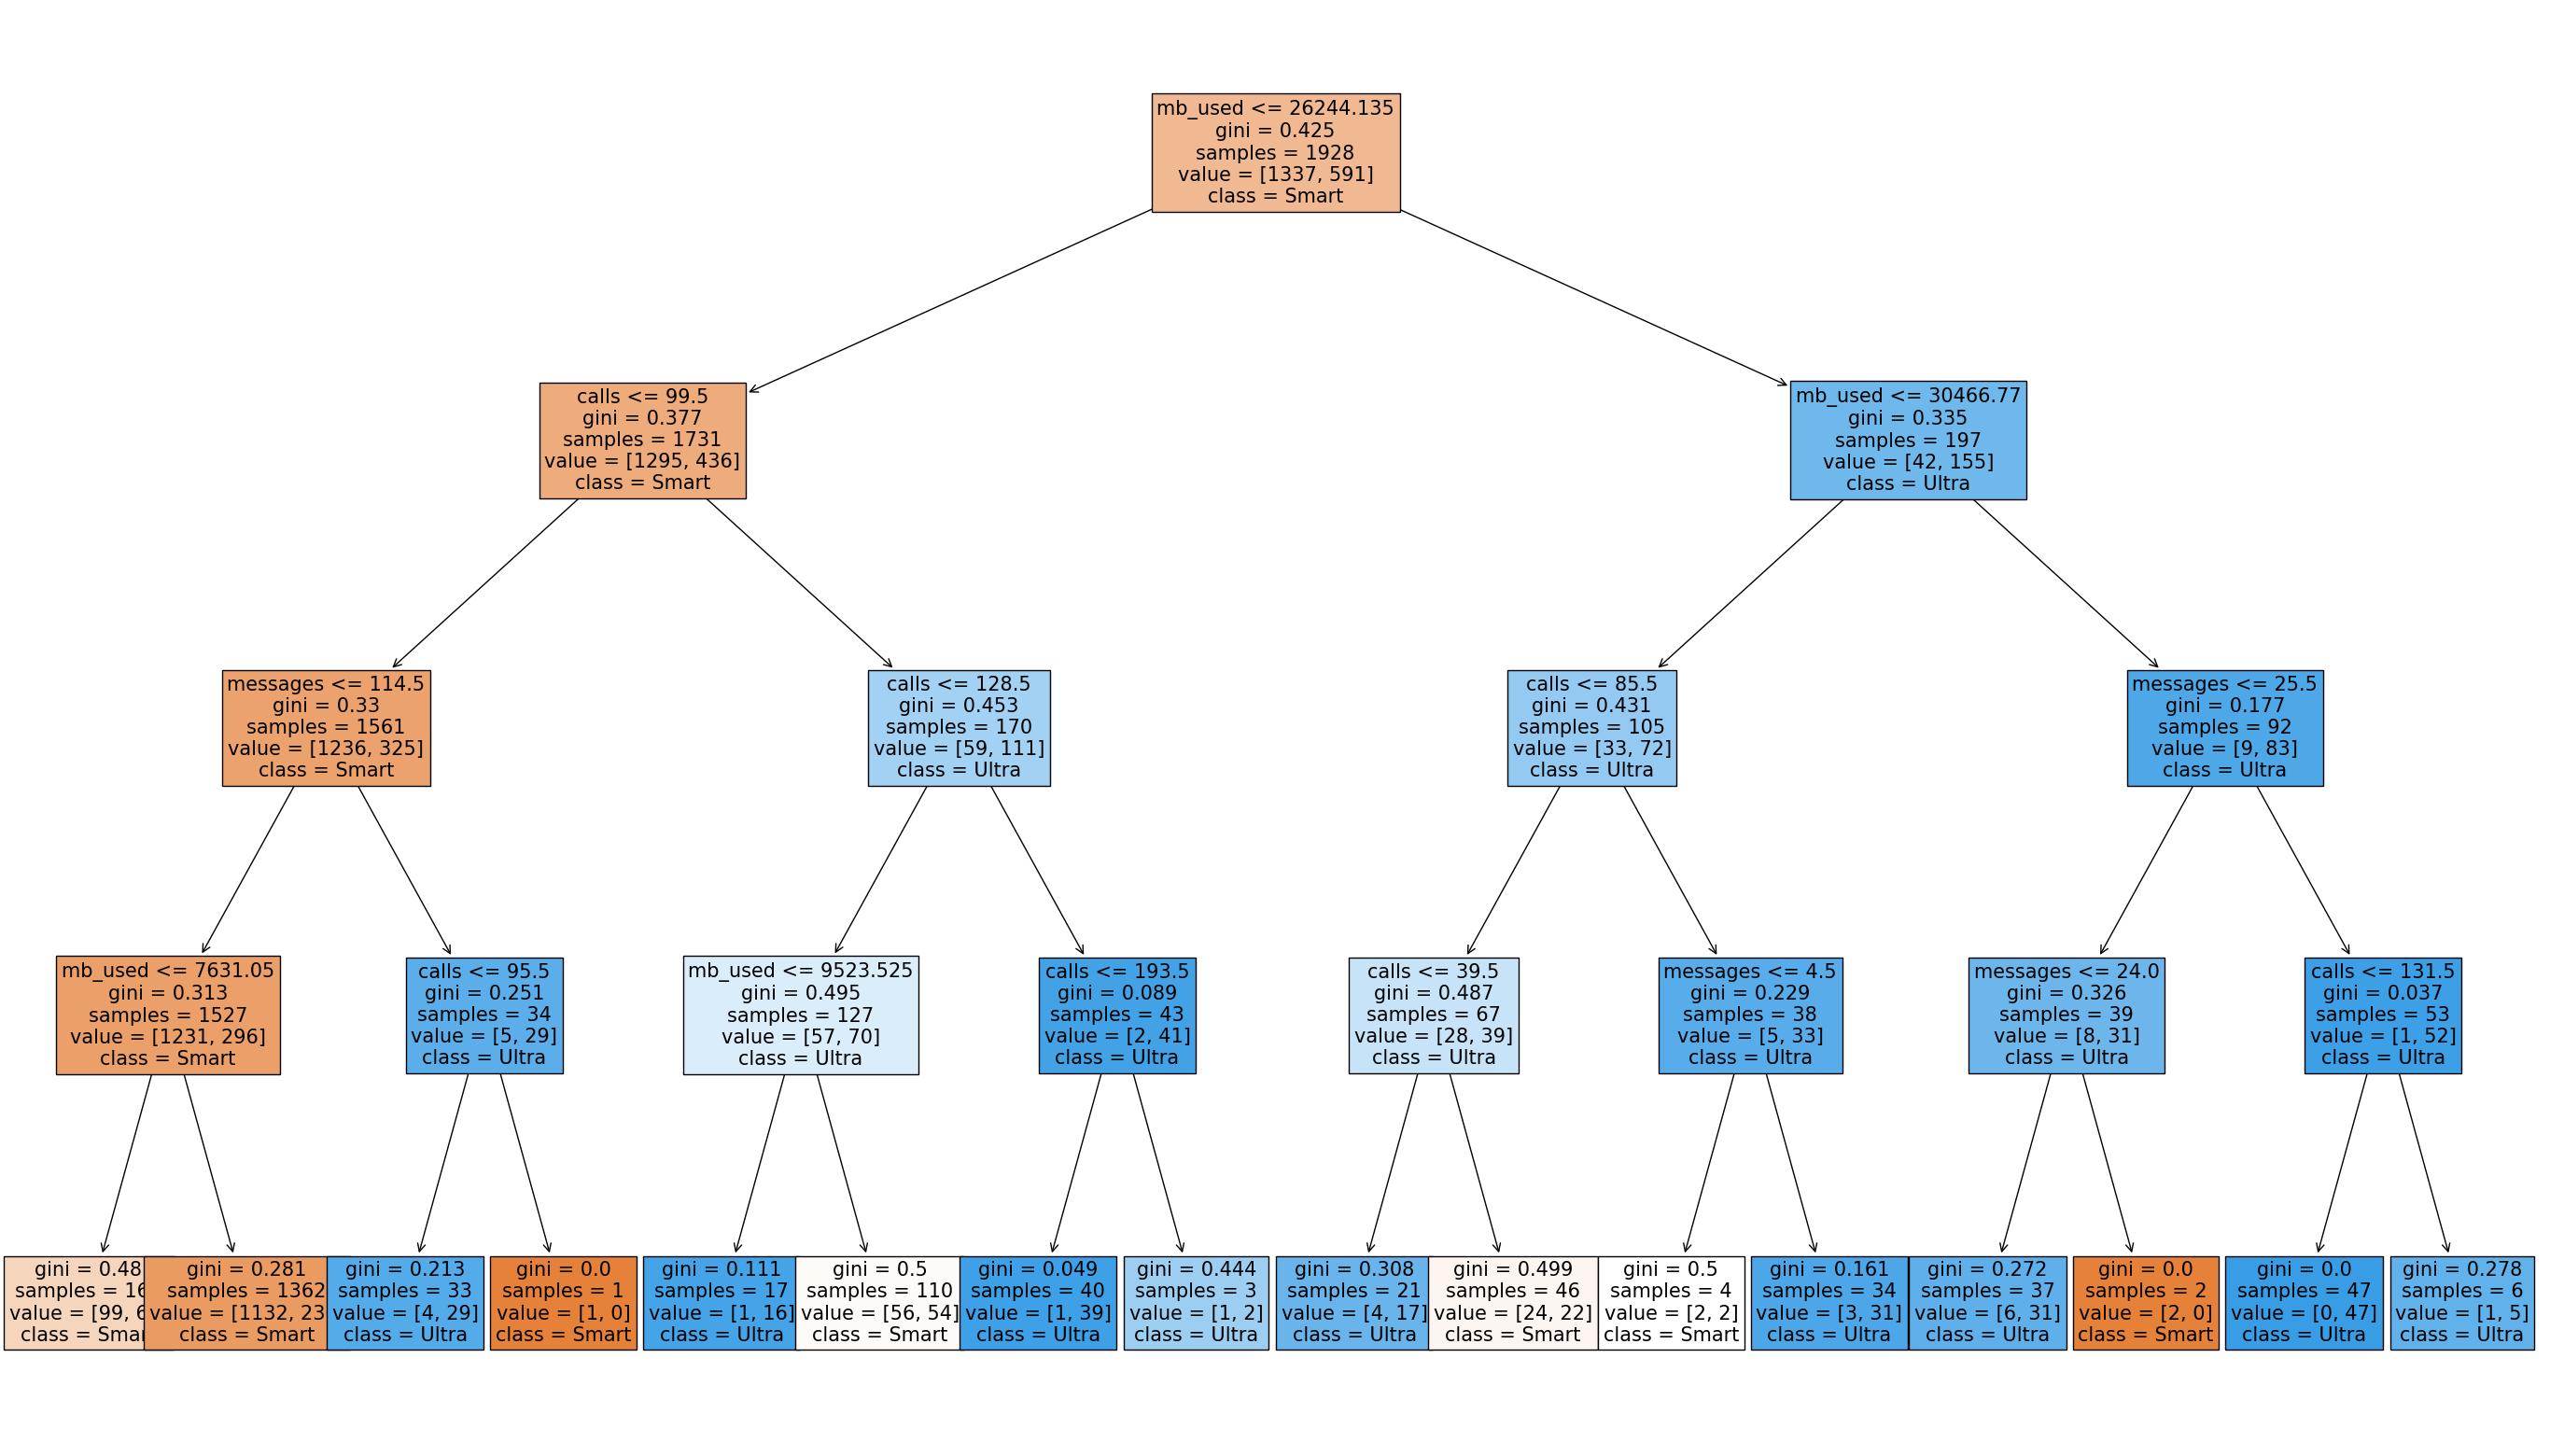

In [16]:
# дерево решений для модели model_depth_4
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(model_depth_4, 
                   feature_names=features_train.columns.values.tolist(), 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15)

Дерево решений для модели `best_model_dt` (модель c `max_depth`=5).

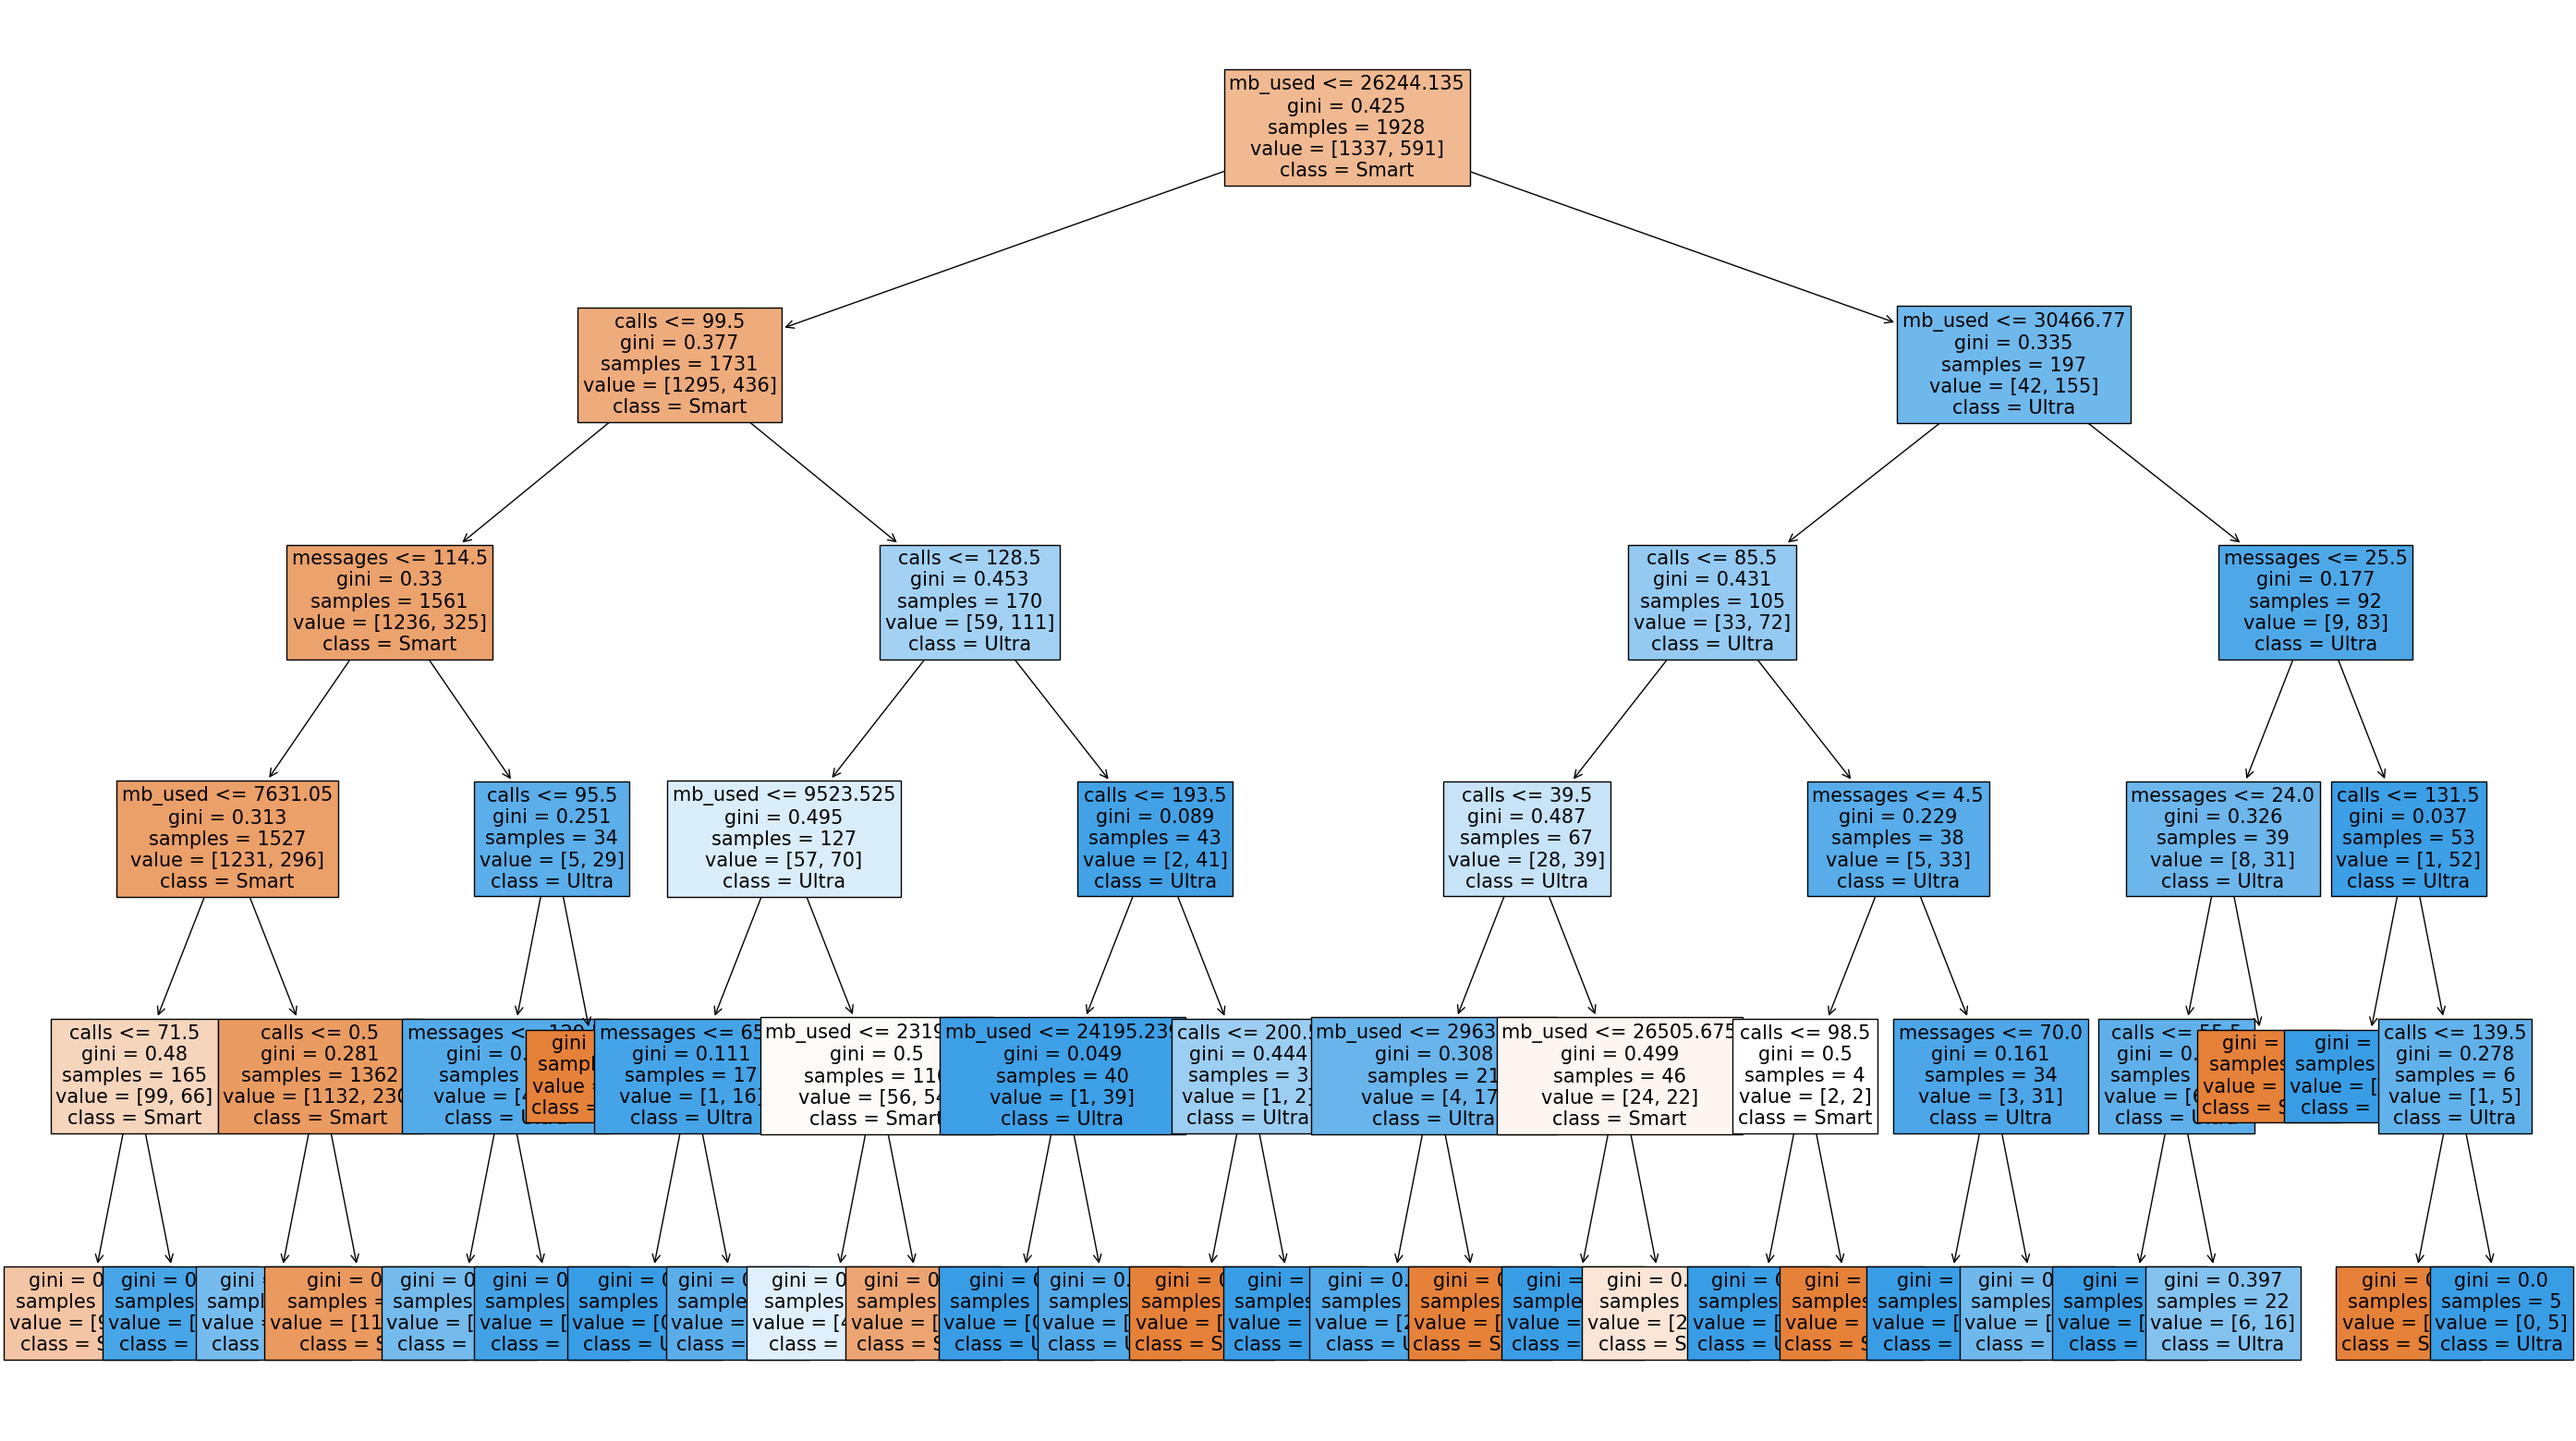

In [17]:
# дерево решений для модели best_model_dt
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_dt, 
                   feature_names=features_train.columns.values.tolist(), 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15)

<a name="52"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.2. `RandomForestClassifier`

Классифицируем валидационные данные с помощью модели **случайного леса *Random Forest***.

Добавим дополнительный гиперпараметр `n_estimators` - количество деревьев.

In [18]:
%%time


# лучшая модель (модель с самой высокой метрикой accuracy)
best_model_rf = None
# количество деревьев лучшей модели
best_est_rf = 0
# глубина дерева лучшей модели
best_depth_rf = 0
# метрика accuracy лучшей модели
best_result_rf = 0

# напишем два цикла для гиперпараметров n_estimators 
# и max_depth от 1 до 10
for est in tqdm(range(1, 11)):
    for depth in range (1, 11):
        # построим модель случайного леса model_rf с заданным количеством 
        # деревьев n_estimators и глубиной дерева max_depth
        model_rf = RandomForestClassifier(random_state=RANDOM_STATE, 
                                          n_estimators=est, 
                                          max_depth=depth)
        # обучим модель на обучающей выборке
        model_rf.fit(features_train, target_train)
        # посчитаем качество модели accuracy на валидационной выборке
        result = model_rf.score(features_valid, target_valid)
        
        # сохраним лучшие параметры
        if result > best_result_rf:
            # сохраним лучшую модель
            best_model_rf = model_rf
            # сохраним количество деревьев лучшей модели
            # на валидационной выборке
            best_est_rf = est 
            # сохраним глубину дерева лучшей модели
            # на валидационной выборке
            best_depth_rf = depth
            # сохраним метрику accuracy лучшей модели
            # на валидационной выборке
            best_result_rf = result
        
        
print('Best model RF valid:', best_model_rf)
print('Best max_depth RF valid:', best_depth_rf)
print('Best n_estimators RF valid:', best_est_rf)
print(f'Best accuracy RF valid: {best_result_rf:.2f}')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.39it/s]

Best model RF valid: RandomForestClassifier(max_depth=9, n_estimators=9, random_state=12345)
Best max_depth RF valid: 9
Best n_estimators RF valid: 9
Best accuracy RF valid: 0.83
CPU times: total: 1.58 s
Wall time: 1.57 s


Лучшая модель случайного леса **`RandomForestClassifier`** на валидационной выборке имеет значение метрики оценки качества:
- ***accuracy = 0.83*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 9
- количество деревьев: `n_estimators` = 9

Качество *accuracy* модели случайного леса на валидационной выборке выше, чем у модели дерева решений.

<a name="53"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.3. `RandomForestClassifier` + `GridSearchCV`

Для получения лучшей модели **случайного леса *Random Forest*** можно автоматически подбирать гиперпараметры с помощью функции **`GridSearchCV`**. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. Поэтому мы можем её применить к промежуточной выборке `train_valid`, оставшейся после выделения тестовой выборки из исходных данных.

Для построения модели используем те же диапазоны значений гиперпараметров, что и в прошлый раз.

In [19]:
%%time


# построим модель случайного леса rf
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (1, 11),
              'max_depth': range (1, 11)}

# построим модель model_rf_grid с помощью функции GridSearchCV,
# укажем значение параметра кроссвалидации cv=5
model_rf_grid = GridSearchCV(rf, parameters, cv=5)
# обучим модель model_rf_grid на обучающей выборке
model_rf_grid.fit(features_train_valid, target_train_valid)


print(f'Best model RF+GridSearchCV: {model_rf_grid.best_estimator_}')
print(f'Best params RF+GridSearchCV: {model_rf_grid.best_params_}')
print(f'Best accuracy RF+GridSearchCV: {model_rf_grid.best_score_:.2f}')

Best model RF+GridSearchCV: RandomForestClassifier(max_depth=8, n_estimators=10, random_state=12345)
Best params RF+GridSearchCV: {'max_depth': 8, 'n_estimators': 10}
Best accuracy RF+GridSearchCV: 0.81
CPU times: total: 8.5 s
Wall time: 8.51 s


Лучшая модель случайного леса **`RandomForestClassifier`** с использованием функции `GridSearchCV` на валидационной выборке имеет значение метрики оценки качества:
- ***accuracy = 0.81*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 8
- количество деревьев: `n_estimators` = 10


Таким образом, функция `GridSearchCV` в качестве лучшей вывела менее качественную модель случайного леса по сравнению с первым вариантом без использования кросс-валидации.

<a name="54"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.4. `LogisticRegression`

Классифицируем валидационные данные с помощью модели **логистической регрессии *Logistic Regression***.

Добавим дополнительные гиперпараметры: `solver='lbfgs'` и `max_iter=1000`. Первый гиперпараметр позволяет выбрать алгоритм, который будет строить модель. Алгоритм `'lbfgs'` — один из самых распространённых. Он подходит для большинства задач. Гиперпараметром `max_iter` задаётся максимальное количество итераций обучения. Значение этого параметра по умолчанию равно 100, но в некоторых случаях понадобится больше итераций.

In [20]:
%%time


model_lr = LogisticRegression(random_state=RANDOM_STATE, 
                              solver='lbfgs', 
                              max_iter=1000) 
model_lr.fit(features_train, target_train) 
best_result_lr = model_lr.score(features_valid, target_valid) 


print(f'Best accuracy LR valid: {best_result_lr:.2f}')

Best accuracy LR valid: 0.71
CPU times: total: 15.6 ms
Wall time: 11.9 ms


Модель логистической регрессии **`LogisticRegression`** на валидационной выборке имеет значение метрики оценки качества:
- ***accuracy = 0.71***

<a name="55"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.5. Сравнение моделей

Выведем значения метрики качества `accuracy` разных моделей в виде таблицы `table`.

In [21]:
table = pd.DataFrame([
     ['DecisionTreeClassifier', f'{best_result_dt:.2f}'],
     ['RandomForestClassifier', f'{best_result_rf:.2f}'],
     ['RandomForestClassifier + GridSearchCV', 
      f'{model_rf_grid.best_score_:.2f}'],
     ['LogisticRegression', f'{best_result_lr:.2f}']
    ],
columns=['model', 'accuracy'])

print('Accuracy разных моделей')
table

Accuracy разных моделей


,model,accuracy
0,DecisionTreeClassifier,0.80
1,RandomForestClassifier,0.83
2,RandomForestClassifier + GridSearchCV,0.81
3,LogisticRegression,0.71


Качество модели логистической регрессии на валидационной выборке ниже, чем у модели дерева решений и случайного леса.

Итак, на валидационной выборке по качеству лидирует модель случайного леса **`RandomForestClassifier`**.

<a name="56"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 5.6. Вывод

В разделе [**Исследование моделей**](#5.-Исследование-моделей) было исследовано качество *accuracy* разных моделей:
- модель дерева решений `DecisionTreeClassifier`;
- модель случайного леса `RandomForestClassifier`;
- модель случайного леса `RandomForestClassifier` с применением функции `GridSearchCV` для автоматического подбора гиперпараметров;
- модель логистической регрессии `LogisticRegression`.

   
В результате выполнения задач этого раздела было выявлено следующее:
1. Лучшая модель дерева решений **`DecisionTreeClassifier`** на валидационной выборке имеет значение метрики оценки качества:
    - ***accuracy = 0.80*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 5
    

2. Лучшая модель случайного леса **`RandomForestClassifier`** на валидационной выборке имеет значение метрики оценки качества:
    - ***accuracy = 0.83*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 9
    - количество деревьев: `n_estimators` = 9


3. Лучшая модель случайного леса **`RandomForestClassifier`** с использованием функции `GridSearchCV` на валидационной выборке имеет значение метрики оценки качества:
    - ***accuracy = 0.81*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 8
    - количество деревьев: `n_estimators` = 10


4. Модель логистической регрессии **`LogisticRegression`** на валидационной выборке имеет значение метрики оценки качества:
    - ***accuracy = 0.71***


5. Качество модели логистической регрессии на валидационной выборке ниже, чем у модели дерева решений и случайного леса.
6. На валидационной выборке по качеству лидирует модель случайного леса **`RandomForestClassifier`** без применения функции `GridSearchCV`.

<a name="6"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 6. Тестирование лучшей модели

<a name="61"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.1. Качество модели

На валидационной выборке по качеству *accuracy* лидирует модель **случайного леса `RandomForestClassifier`** без применения функции `GridSearchCV`. Проверим качество этой модели на тестовой выборке.

In [22]:
# получим предсказания модели на тестовой выборке
predictions_rf_test = model_rf.predict(features_test)
# вычислим метрику качества accuracy (долю правильных ответов)
accuracy_rf = accuracy_score(target_test, predictions_rf_test)

print(f'Best accuracy RF test: {accuracy_rf:.2f}')

Best accuracy RF test: 0.79


Лучшая модель случайного леса **`RandomForestClassifier`** на тестовой выборке имеет значение метрики оценки качества:
- ***accuracy = 0.79***

<a name="62"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 6.2. Вывод

В разделе [**Тестирование лучшей модели**](#6.-Тестирование-лучшей-модели) было проверено качество *accuracy* лучшей модели случайного леса `RandomForestClassifier` на тестовой выборке.

   
В результате выполнения задач этого раздела было выявлено следующее:
1. Лучшая модель случайного леса **`RandomForestClassifier`** на тестовой выборке имеет значение метрики оценки качества:
    - ***accuracy = 0.79***.
    
    
2. Значение метрики качества лучшей модели *accuracy* > 0.75, что соответствует изначально поставленному условию задачи.

<a name="7"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 7. Проверка модели на адекватность

<a name="71"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 7.1. `DummyClassifier`

Напомним, что датасет `df_corr` не сбалансирован в таргете. Самым частым классом является "0".

In [23]:
df_corr['is_ultra'].value_counts()

is_ultra
0    2229
1     985
Name: count, dtype: int64

Проверим полученную модель `RandomForestClassifier` на адекватность.

С помощью константной модели сделаем наивный прогноз метрики *accuracy* на тестовой выборке. Для построения константной модели используем классификатор `DummyClassifier`.

In [24]:
# построим константную модель model_dummy
model_dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE) 
# обучим модель model_dummy на обучающей выборке
model_dummy.fit(features_train, target_train)
# получим предсказания модели
model_dummy.predict(features_test)
# посчитаем качество модели на тестовой выборке
accuracy_dummy = model_dummy.score(features_test, target_test)

print(f'Наивный прогноз самого частого класса ("0"): {accuracy_dummy:.2f}')

Наивный прогноз самого частого класса ("0"): 0.69


Наивный прогноз самого частого класса "0" составляет 0.69, что гораздо ниже полученного значения метрики качества модели *accuracy* на тестовой выборке. Поэтому модель `RandomForestClassifier` можно считать адекватной.

<a name="72"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
### 7.2. Вывод

В разделе [**Проверка модели на адекватность**](#7.-Проверка-модели-на-адекватность) с помощью константной модели `DummyClassifier` был сделан наивный прогноз метрики *accuracy* на тестовой выборке.

   
В результате выполнения задач этого раздела было выявлено следующее:
- Наивный прогноз самого частого класса "0" составляет 0.69, что гораздо ниже полученного значения метрики качества модели *accuracy* на тестовой выборке. Поэтому модель `RandomForestClassifier` можно считать адекватной.

<a name="8"></a> <div style="text-align: right">[Cодержание](#1.-Содержание)</div>
## 8. Общий вывод

Проведено исследование с целью построения модели машинного обучения, которая поможет предложить пользователям новый тариф «Смарт» или «Ультра» на основании их поведения.  

Результаты исследования позволят оператору мобильной связи перевести клиентов с архивных тарифов на новые.

Входные данные: данные о поведении клиентов, которые уже перешли на эти тарифы.

Перед проведением исследования были сформулированы несколько гипотез:

- Гипотеза 1: лучшая модель на валидационной выборке - модель случайного леса;
- Гипотеза 2: значение метрики качества лучшей модели *accuracy* > 0.75.

В ходе исследования удалось получить следующие результаты **на валидационной выборке**:

1. Лучшая модель дерева решений **`DecisionTreeClassifier`** имеет значение метрики оценки качества:
    - ***accuracy = 0.80*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 5
    

2. Лучшая модель случайного леса **`RandomForestClassifier`** имеет значение метрики оценки качества:
    - ***accuracy = 0.83*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 9
    - количество деревьев: `n_estimators` = 9


3. Лучшая модель случайного леса **`RandomForestClassifier`** с использованием функции `GridSearchCV` имеет значение метрики оценки качества:
    - ***accuracy = 0.81*** 

   при следующих параметрах:
    - глубина дерева: `max_depth` = 8
    - количество деревьев: `n_estimators` = 10


4. Модель логистической регрессии **`LogisticRegression`** имеет значение метрики оценки качества:
    - ***accuracy = 0.71***


Исходя из полученных результатов, можно сделать следующие **выводы**:

Лучшая модель случайного леса **`RandomForestClassifier` на тестовой выборке** имеет значение метрики оценки качества:
- ***accuracy = 0.79***.

В результате исследования удалось выявить следующие зависимости.

<b>Гипотеза 1 подтвердилась:</b>

На валидационной выборке:
- *accuracy* = 0.80 - для модели дерева решений `DecisionTreeClassifier`;
- *accuracy* = 0.83 - для модели случайного леса `RandomForestClassifier`;
- *accuracy* = 0.81 - для модели случайного леса `RandomForestClassifier`, построенной с применением функции `GridSearchCV`;
- *accuracy* = 0.71 - для модели логистической регрессии `LogisticRegression`.

Рекомендация: самой качественной является модель случайного леса `RandomForestClassifier`. 

<b>Гипотеза 2 подтвердилась:</b>

Значение метрики качества *accuracy* лучшей модели случайного леса `RandomForestClassifier`, составляет:
- *accuracy* = 0.83 - на валидационной выборке;
- *accuracy* = 0.79 - на тестовой выборке.

Т.е. здесь присутствует эффект переобучения (результат на тестовой выборке хуже, чем на валидационной).

Рекомендация: значение метрики качества лучшей модели *accuracy* > 0.75, что соответствует изначально поставленному условию задачи.

<b>Общие рекомендации:</b>

Специалистам, которые занимаются исследованием поведения пользователей и планированием увеличения прибыли, можно использовать зависимости из обеих гипотез 1 и 2.